In [1]:
# Elements
import sys
if '..//' not in sys.path:
    sys.path.append('..//')

import os
import json
from opmsim.optical_system_base import OpticalSystem
from opmsim import optical_elements
from opmsim import dipole_source
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline 
#notebook

np.set_printoptions(threshold=sys.maxsize)


savepath = "C:/Users/lnr19/OneDrive - Imperial College London/thesis/for _thesis/modelling/snouty_pupils/"

dipole_count = 100

In [2]:
savepath_full = os.path.join(savepath, "OPM_espim_100dipoles_keeptir")
save_details = os.path.join(savepath_full,'sim_details.txt')

if not os.path.exists(savepath_full):
    os.makedirs(savepath_full)
save_filename = os.path.join(savepath_full,'collection_efficiency.txt')
save_details = os.path.join(savepath_full,'sim_details.txt')

if not os.path.exists(savepath_full):
    os.makedirs(savepath_full)
    
## OPM

O1 = optical_elements.SineLens(NA=1.35, focal_length=0.180/100, n=1.4)
TL1 = optical_elements.SineLens(NA=0.1, focal_length=0.180, n=1)
TL2 = optical_elements.SineLens(NA=0.1, focal_length=0.357142857, n=1)
O2 = optical_elements.SineLens(NA=0.95, focal_length=0.200/40, n=1)
O3 = lambda opm_angle: optical_elements.SineLens(
    NA=1, focal_length=0.180/100, n=1, y_axis_rotation=opm_angle*np.pi/180)
O3_glass = lambda opm_angle: optical_elements.SineLens(
    NA=1, focal_length=0.180/100, n=1, interface_ris=[1.5], y_axis_rotation=opm_angle*np.pi/180, \
    fresnel_debug_savedir=savepath_full)
O3_glass_water = lambda opm_angle: optical_elements.SineLens(
    NA=1, focal_length=0.180/100, n=1., interface_ris=[1.5,1.33],
    y_axis_rotation=opm_angle*np.pi/180, keep_TIR=False)

TL3 = optical_elements.SineLens(NA=0.1, focal_length=0.1013, n=1)

elements_air = lambda opm_angle: [O1, TL1, TL2, O2, O3(opm_angle)]
elements_water = lambda opm_angle: [O1, TL1, TL2, O2, O3_glass_water(opm_angle)]
elements_snouty = lambda opm_angle: [O1, TL1, TL2, O2, O3_glass(opm_angle)]


elements = elements_water
# elements = elements_air
# elements = elements_snouty

elements_test = elements(0)

# Check magnification is correct
M1 = elements_test[1].focal_length/elements_test[0].focal_length
M2 = elements_test[2].focal_length/elements_test[3].focal_length
Mt = M1/M2

if abs(Mt-elements_test[0].n)>5e-3:
    print("Focal lengths: %f %f %f %f" % (elements_test[0].focal_length, elements_test[1].focal_length, elements_test[2].focal_length, elements_test[3].focal_length))
    raise ValueError("Refocusing system magnification is not correct: %f not %f" % (Mt, elements_test[0].n))
    

options = {
    'ray_count': 7500,
    'draw_rays': False,
    'max_rays_stored': 10000,
    'calculate_entrance_pupil': True
}

plot_options = {
    'title': 'Pupil intensity at final image plane of OPM microscope',
    'pupil_boundary_radius': 0,
    'scale_range': None, # [0,0.3]
    'add_autoscale_plots': True
}

plot_options_p = plot_options; plot_options_s = plot_options; plot_options_un = plot_options;
plot_options_p['scale_range'] = [0,3,4]
plot_options_s['scale_range'] = [0,3,4]
plot_options_un['scale_range'] = [0,7,5]
        
s_pol = lambda opm_angle: (0, -(90-opm_angle)*np.pi/180)
p_pol = (np.pi/2,0)


opm_ce_filename = os.path.join(savepath_full,'opm_collection_efficiency.txt')

opm_angles = np.arange(0, 60, 5)
# opm_angles = [0]
print("OPM angles:", opm_angles)    


OPM angles: [ 0  5 10 15 20 25 30 35 40 45 50 55]


Full sphere generation
cap method area sum 12.439450271154142
expected area sum 6.283185307179586
cap method area sum 4.533102344651518
expected area sum 4.6189942582779135


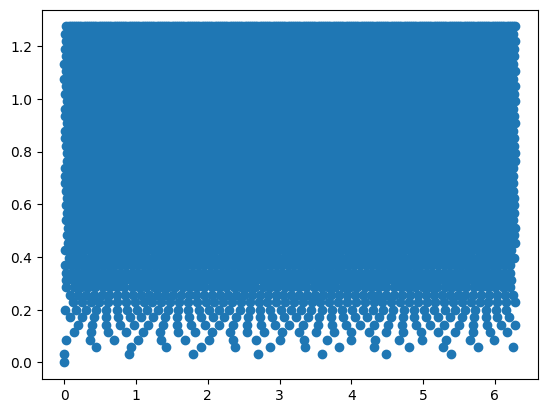

n_dipoles 99
n_rays 5666
pvec shape (99, 1, 3)
nvec shape (1, 5666, 3)
(99, 5666, 3, 1)
(99, 1, 1, 1)
initial energy shape ()
cap method area sum 6.193491053334434
expected area sum 6.283185307179586
n_dipoles 99
n_rays 7609
pvec shape (99, 1, 3)
nvec shape (1, 7609, 3)
(99, 7609, 3, 1)
(99, 1, 1, 1)
initial energy shape ()
n rays 2pi =  7609
(5666, 3, 1)
n rays =  5666
NA area vs real area? 4.533102344651518 4.6189942582779135
half_sphere_energy 4.129214918476802
initial_energy 3.025147406012091
rays when NA scaled up to hemisphere 7853.457796399326
initialisation time in system 0.542615s
Flat pupil
ELEMENT: <opmsim.optical_elements.SineLens object at 0x00000205A30180D0>
CURVED REFRACTION
max rho curved 0.001721522464367897
ELEMENT: <opmsim.optical_elements.SineLens object at 0x00000205A30109A0>
max rho flat 0.0024101314501150557
FLAT REFRACTION
ELEMENT: <opmsim.optical_elements.SineLens object at 0x00000205A3018820>
CURVED REFRACTION
max rho curved 0.0
ELEMENT: <opmsim.optical_elemen

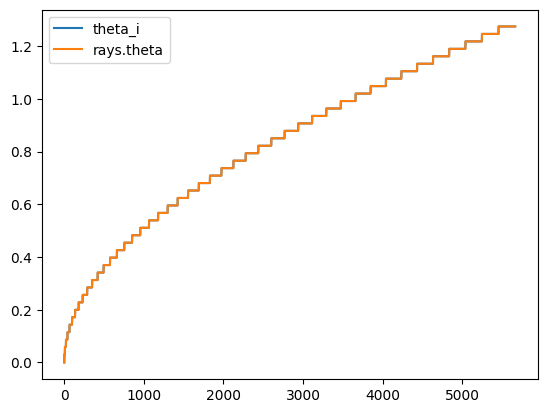

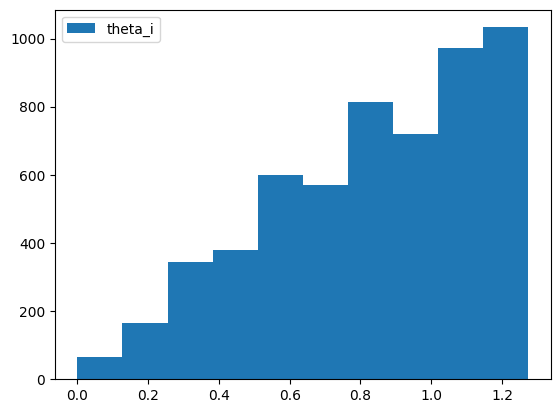

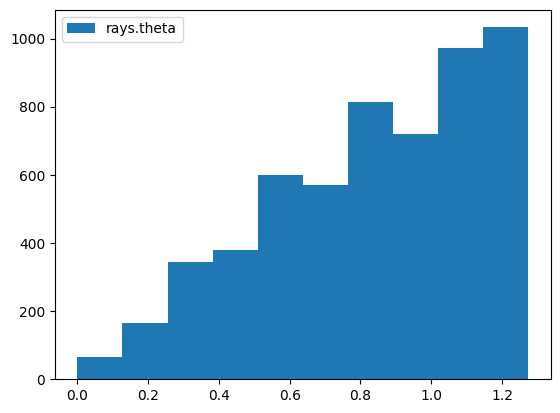

(5666, 3)
()
()
(5666, 3)
(5666, 3)
()
()
(5666, 3)
(5666,)
(5666,)
(5666,)
(5666,)
Additional surfaces
(5666,)
(5666,)
(5666,)
(5666,)


C:\Users\lnr19\code\OPMsim\notebooks\..\opmsim\optical_matrices.py:101: RuntimeWarning: invalid value encountered in arcsin
  theta_t[np.invert(total_internal_reflection_mask)] = np.arcsin(sin_theta_t[np.invert(total_internal_reflection_mask)])


I_sum_before 3781.1820469238005
I_sum_after nan
I_sum_after/I_sum_before nan
CURVED REFRACTION
max rho curved 0.001721522463679288
Saved checkpoint with 10000 rays


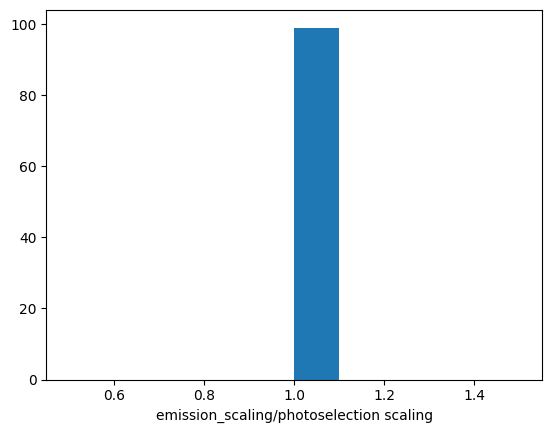

Limiting radius for detector: 0.0024300000000000003
Energy ratio (efficiency): nan
Total energy per dipole per ray: nan
Energy from Ix nan
Energy from Iy nan
X/Y energy ratio = nan
Half sphere energy 4.129214918476802
Initial energy 3.025147406012091
half sphere energy NA 3.0222298970529384
maxr 0.0024300000000000003
210 escaped out of 5666
Saved checkpoint with 10000 rays
210 escaped out of 5666
time in trace_rays 9.854075s
ray count 5456
max Ix nan
scale range in _plot_unstructured [0, 7, 5]
min for scale 0
max for scale 7
Filling background of polar plot with zeroes!
pupil_boundary_radius 0 max_r 0.0017059667213327708
max_r_reduced 0.001705945635627588 max_r 0.0017059667213327708


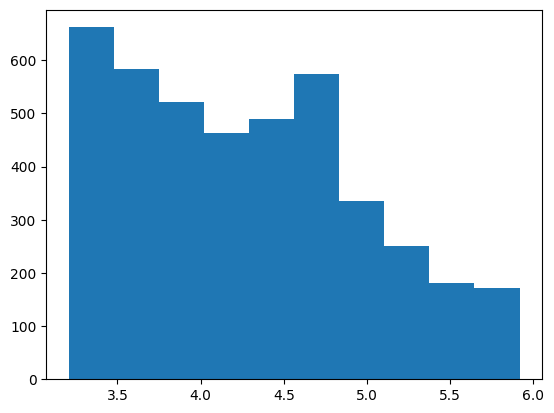

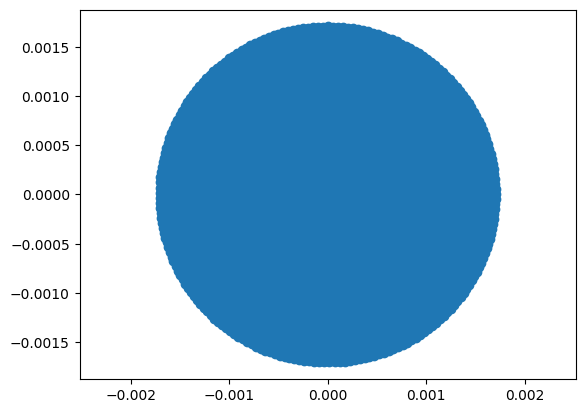

C:\Users\lnr19\Anaconda3\envs\polarisation_model\lib\site-packages\matplotlib\tri\_triangulation.py:179: RuntimeWarning: invalid value encountered in cast
  triangles = np.asarray(triangles, dtype=np.int32)
C:\Users\lnr19\code\OPMsim\notebooks\..\opmsim\detector.py:111: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if pupil_boundary_radius is 'max_r':
C:\Users\lnr19\code\OPMsim\notebooks\..\opmsim\detector.py:111: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if pupil_boundary_radius is 'max_r':


ValueError: z array must not contain non-finite values within the triangulation

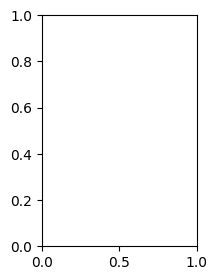

In [3]:
elements_fun = elements

with open(save_details, 'a') as f:
    f.write("focal lengths:\n")
    f.write("O1,TL1,TL2,O2,O3\n")
    fs=[el.focal_length for el in elements_fun(0)]
    f.write(",".join(str(item) for item in fs))
    f.write("\noptions:\n")
    f.write(json.dumps(options))
    
with open(save_filename, 'a') as f:
    f.write("angle,polarisation,NA1,NA2,NA3,RCE,EE,CE\n")
    for opm_angle in opm_angles:
        # un/depolarised
        source = dipole_source.DipoleSource()
        # source.add_dipoles((0,0))
        source.generate_dipoles(dipole_count)

        system = OpticalSystem("OPM (%d degrees) rapid tumbling" % opm_angle, elements_fun(opm_angle), source, options)
        system.trace()
        plot_options['title'] = \
            r'Intensity in exit pupil for OPM: $\theta_{OPM}=%d^{\circ}$, rapidly tumbling fluorophores' \
            % (opm_angle)
        pupil_fig = system.detector.plot_pupil(**plot_options_un)
        pupil_fig.savefig(os.path.join(savepath_full, "pupil_plot_tumbling_%d.png" % (opm_angle)), bbox_inches='tight' )

        f.write("%0.4f,%s, %.2f,%.2f,%.2f,%0.5f,%0.5f,%0.5f\n" % 
            (opm_angle, "unpolarised", elements_fun(opm_angle)[0].NA, elements_fun(opm_angle)[3].NA, elements_fun(opm_angle)[4].NA,
             system.detector.relative_collection_efficiency,
             system.detector.emission_efficiency, 
             system.detector.collection_efficiency)
            )

        plot_options['title'] = \
            r'Intensity incident on O1 pupil for OPM: $\theta_{OPM}=%d^{\circ}$, rapidly tumbling fluorophores'\
            % (opm_angle)
        pupil_fig_i = system.initial_detector.plot_pupil(**plot_options_un)
        pupil_fig_i.savefig(os.path.join(savepath_full, "initial_pupil_plot_tumbling_%d.png" % (opm_angle)), bbox_inches='tight' )

        # p-polarised 
        source = dipole_source.DipoleSource()
        source.generate_dipoles(dipole_count)
        source.classical_photoselection(p_pol)
        # source.add_dipoles((0,0))


        system = OpticalSystem("OPM system (%d degrees) p-polarised" % opm_angle, elements_fun(opm_angle), source, options)
        system.trace()
        plot_options['title'] = \
            r'Intensity in exit pupil for OPM: $\theta_{OPM}=%d^{\circ}$, p-polarised excitation, static fluorophores'\
            % (opm_angle)
        pupil_fig = system.detector.plot_pupil(**plot_options_p)
        pupil_fig.savefig(os.path.join(savepath_full, "pupil_plot_p-polarised_%d.png" % (opm_angle)), bbox_inches='tight' )

        f.write("%0.4f,%s, %.2f,%.2f,%.2f,%0.5f,%0.5f,%0.5f\n" % 
            (opm_angle, "p-polarised", elements_fun(opm_angle)[0].NA, elements_fun(opm_angle)[3].NA, elements_fun(opm_angle)[4].NA,
             system.detector.relative_collection_efficiency,
             system.detector.emission_efficiency, 
             system.detector.collection_efficiency)
            )

        plot_options['title'] = \
            r'Intensity incident on O1 pupil for OPM: $\theta_{OPM}=%d^{\circ}$, p-polarised excitation, static fluorophores'\
            % (opm_angle)
        pupil_fig_i = system.initial_detector.plot_pupil(**plot_options_p)
        pupil_fig_i.savefig(os.path.join(savepath_full, "initial_pupil_plot_p-polarised_%d.png" % (opm_angle)), bbox_inches='tight')

        # s-polarised
        source = dipole_source.DipoleSource()
        source.generate_dipoles(dipole_count)
        source.classical_photoselection(s_pol(opm_angle))
        # source.add_dipoles((0,0))

        system = OpticalSystem("OPM system (%d degrees) s-polarised" % opm_angle, elements_fun(opm_angle), source, options)
        system.trace()
        plot_options['title'] = \
            r'Intensity in exit pupil for OPM: $\theta_{OPM}=%d^{\circ}$, s-polarised excitation, static fluorophores'\
            % (opm_angle)
        pupil_fig = system.detector.plot_pupil(**plot_options_s)
        pupil_fig.savefig(os.path.join(savepath_full, "pupil_plot_s-polarised_%d.png" % (opm_angle)), bbox_inches='tight' )

        f.write("%0.4f,%s, %.2f,%.2f,%.2f,%0.5f,%0.5f,%0.5f\n" % 
            (opm_angle, "s-polarised", elements_fun(opm_angle)[0].NA, elements_fun(opm_angle)[3].NA, elements_fun(opm_angle)[4].NA,
             system.detector.relative_collection_efficiency,
             system.detector.emission_efficiency, 
             system.detector.collection_efficiency)
            )

        plot_options['title'] = \
            r'Intensity incident on O1 pupil for OPM: $\theta_{OPM}=%d^{\circ}$, s-polarised excitation, static fluorophores'\
            % (opm_angle)
        pupil_fig_i = system.initial_detector.plot_pupil(**plot_options_s)
        pupil_fig_i.savefig(os.path.join(savepath_full, "initial_pupil_plot_s-polarised_%d.png" % (opm_angle)), bbox_inches='tight' )



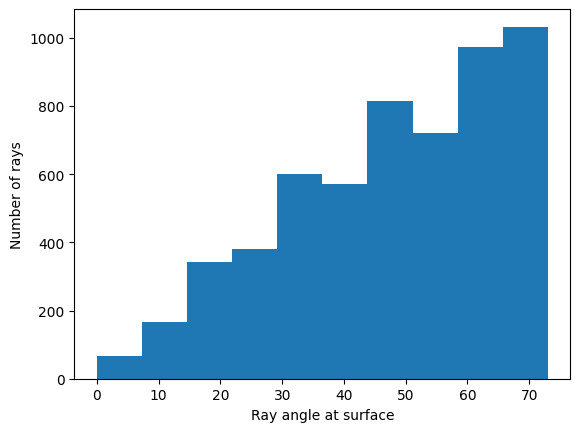

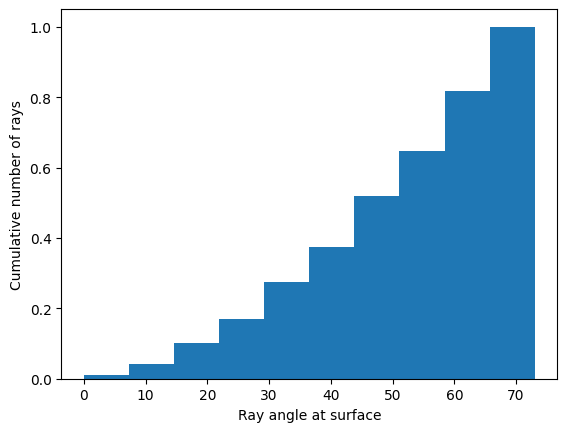

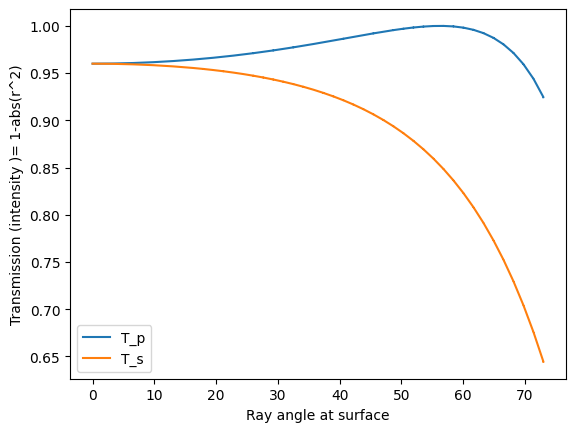

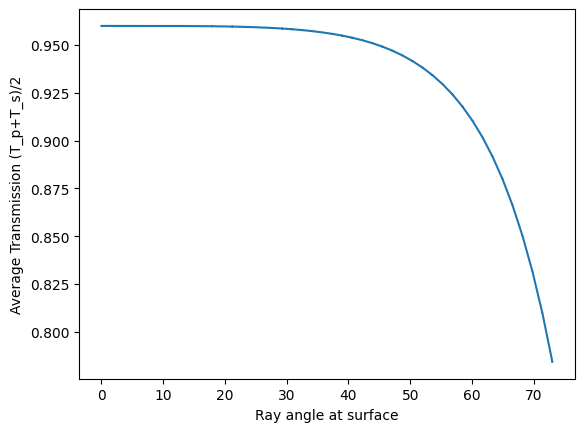

mean Tp 0.9805394890469963
mean Ts 0.857975764942388


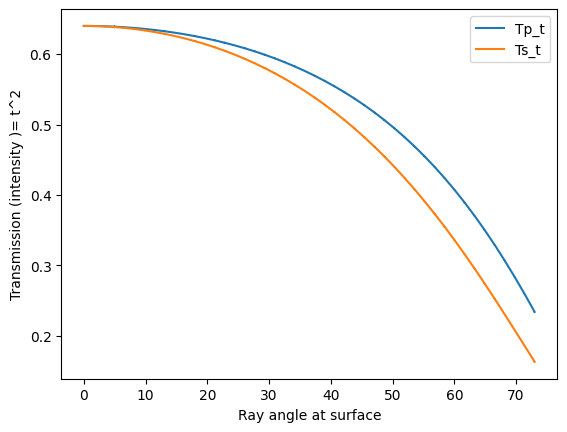

In [8]:
thetas = np.loadtxt(os.path.join(savepath_full, 'theta.csv'))
plt.hist(180*thetas/np.pi)
plt.ylabel("Number of rays")
plt.xlabel("Ray angle at surface")
plt.show()
plt.hist(180*thetas/np.pi, cumulative=True, density=True)
plt.ylabel("Cumulative number of rays")
plt.xlabel("Ray angle at surface")
plt.show()
Tp = np.loadtxt(os.path.join(savepath_full, 'T_p.csv'))
plt.plot(thetas*180/np.pi, Tp,label='T_p')
Ts = np.loadtxt(os.path.join(savepath_full, 'T_s.csv'))
plt.plot(thetas*180/np.pi, Ts, label='T_s')
plt.legend()
plt.ylabel("Transmission (intensity )= 1-abs(r^2)")
plt.xlabel("Ray angle at surface")
plt.show()
plt.plot(thetas*180/np.pi, (Tp + Ts)/2)
plt.ylabel("Average Transmission (T_p+T_s)/2")
plt.xlabel("Ray angle at surface")
plt.show()
print("mean Tp", np.mean(Tp))
print("mean Ts", np.mean(Ts))

t_p = np.loadtxt(os.path.join(savepath_full,"mat_t_p.csv"),dtype=np.complex_)
t_s = np.loadtxt(os.path.join(savepath_full,"mat_t_s.csv"),dtype=np.complex_)

#print("t_p^2", t_p*np.conj(t_p))
#print("t_s^2", t_s*np.conj(t_s))

Ts_t = t_s*t_s
Tp_t = t_p*t_p

plt.plot(thetas*180/np.pi, Tp_t, label='Tp_t')
plt.plot(thetas*180/np.pi, Ts_t, label='Ts_t')
plt.legend()
plt.ylabel("Transmission (intensity )= t^2")
plt.xlabel("Ray angle at surface")
plt.show()
